# Training a (Fully Expressive) Toy Model

In [8]:
import model as m
import data as d
import numpy as np
import torch as t
from matplotlib import pyplot as plt
from utils.plot.plotfuncs import plot_matrix_vector

In [9]:
n_sparse = 512
m_cfg = m.Config(
    n_sparse=n_sparse,
    n_dense=128,
    final_layer_bias= True,
    lr = (3e-3) / np.sqrt(n_sparse),
    convergence_tolerance = 0,
    max_epochs = 1000
)

model = m.Model(m_cfg)
d_cfg = d.Config(p_feature = 0.045, n_input = 512, domain = (0,1))
datafactory = d.DataFactory(d_cfg)

model.optimize(datafactory, logging=True)

loss_change=inf
loss.item() = 0.015982748940587044
epoch=0 len(losses) = 1
loss_change=inf
loss.item() = 0.0060944040305912495
epoch=97 len(losses) = 976
loss_change=inf
loss.item() = 0.004549636039882898
epoch=195 len(losses) = 1952
loss_change=np.float64(0.06468610037175448)
loss.item() = 0.0042681568302214146
epoch=292 len(losses) = 2928
loss_change=np.float64(0.0240506368726221)
loss.item() = 0.004152602981775999
epoch=390 len(losses) = 3904
loss_change=np.float64(0.015601305724024517)
loss.item() = 0.003800458973273635
epoch=487 len(losses) = 4880
loss_change=np.float64(0.01094414481096706)
loss.item() = 0.0038560139946639538
epoch=585 len(losses) = 5856
loss_change=np.float64(0.007521811593574679)
loss.item() = 0.0038156076334416866
epoch=683 len(losses) = 6832
loss_change=np.float64(0.005309979319368274)
loss.item() = 0.0039165741764009
epoch=780 len(losses) = 7808
loss_change=np.float64(0.0034757577539861195)
loss.item() = 0.003800362581387162
epoch=878 len(losses) = 8784
loss_

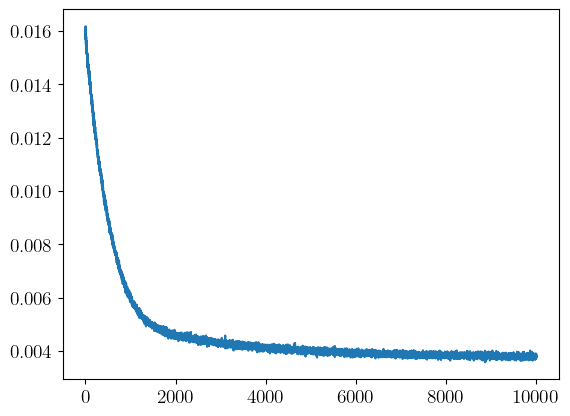

In [10]:
plt.plot(model.losses)
plt.show()

1.3014667 -0.42157024


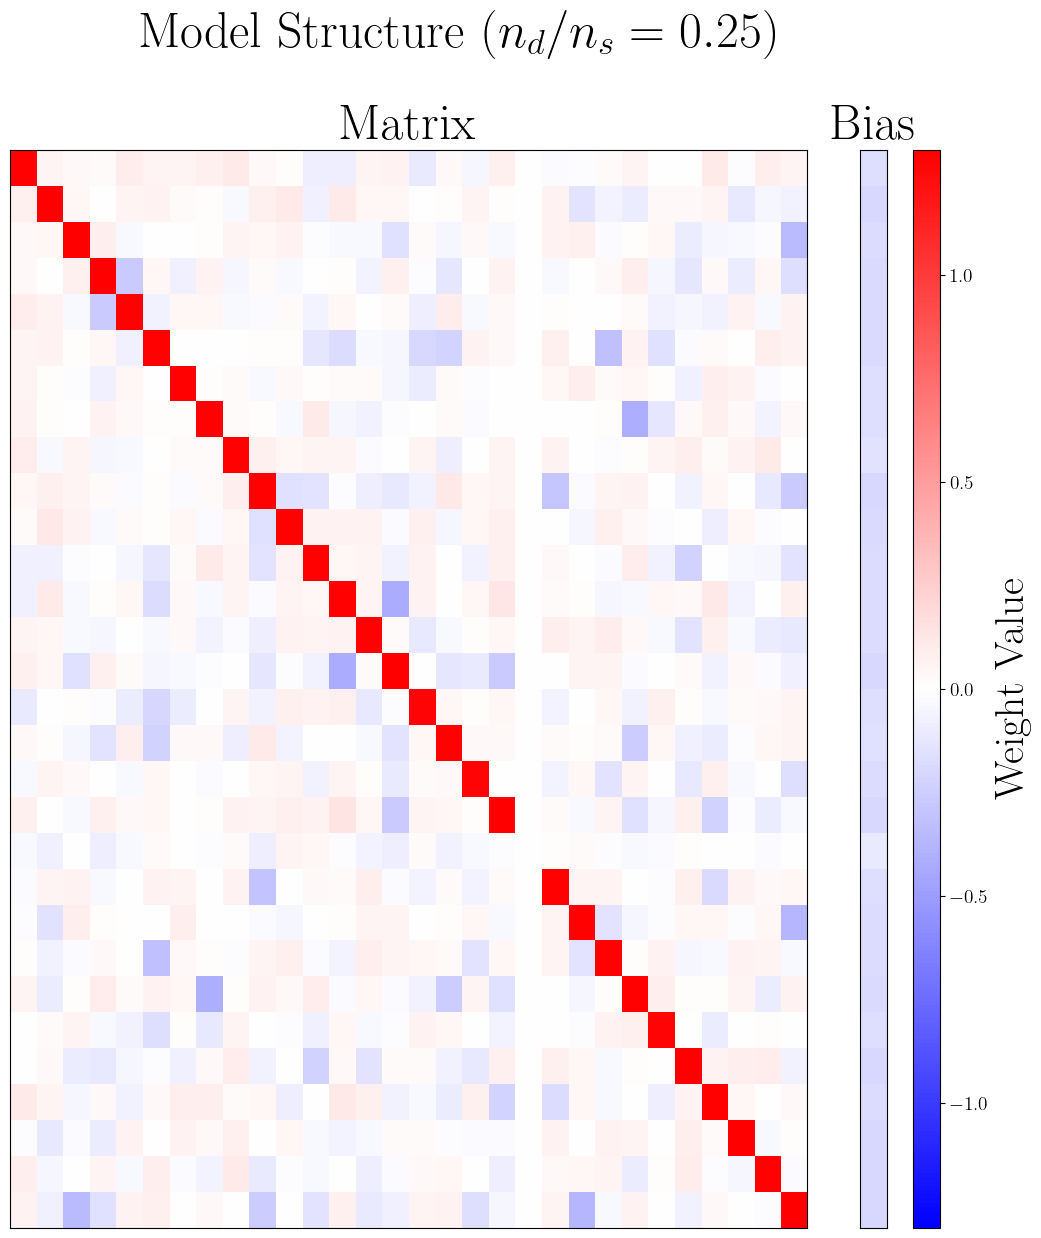

In [11]:
model_Wmat = model.W_matrix()[0:30,0:30].detach().cpu().numpy()
model_mean = model.final_layer.bias.detach().cpu().numpy()[:30]
plot_matrix_vector(model_Wmat, model_mean, ratio=m_cfg.n_dense / m_cfg.n_sparse)


# Training a Persian Rug Model

loss_change=inf
loss.item() = 0.019044537097215652
epoch=0 len(losses) = 1
loss_change=inf
loss.item() = 0.005256262142211199
epoch=9 len(losses) = 2
loss_change=inf
loss.item() = 0.004984637256711721
epoch=19 len(losses) = 3
loss_change=inf
loss.item() = 0.005109952297061682
epoch=29 len(losses) = 4
loss_change=inf
loss.item() = 0.004997320473194122
epoch=38 len(losses) = 5
loss_change=inf
loss.item() = 0.004989932291209698
epoch=48 len(losses) = 6
loss_change=inf
loss.item() = 0.0050635444931685925
epoch=58 len(losses) = 7
loss_change=inf
loss.item() = 0.005125598516315222
epoch=67 len(losses) = 8
loss_change=inf
loss.item() = 0.005044414661824703
epoch=77 len(losses) = 9
loss_change=inf
loss.item() = 0.005065248813480139
epoch=87 len(losses) = 10
loss_change=inf
loss.item() = 0.004984267055988312
epoch=96 len(losses) = 11


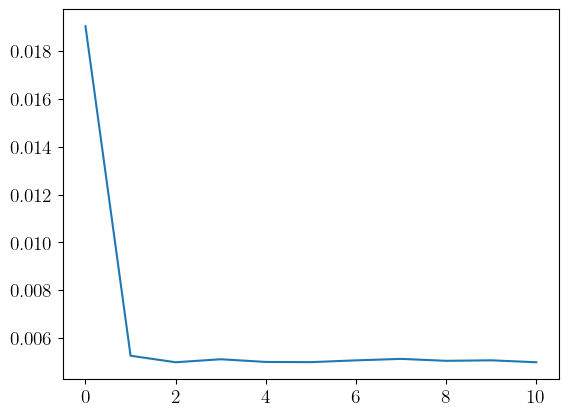

In [12]:
import hadamard_model as hm

h_cfg = hm.HadamardConfig(
    n_sparse = n_sparse,
    n_dense = 128,
    scalar_of_Identity = True,
    lr = (3e-1) / np.sqrt(n_sparse),
    max_epochs = 100
)

h_model = hm.HadamardModel(h_cfg)
h_model.optimize(datafactory, logging=True)

plt.plot(h_model.losses)
plt.show()



1.0 -0.3231435716152191


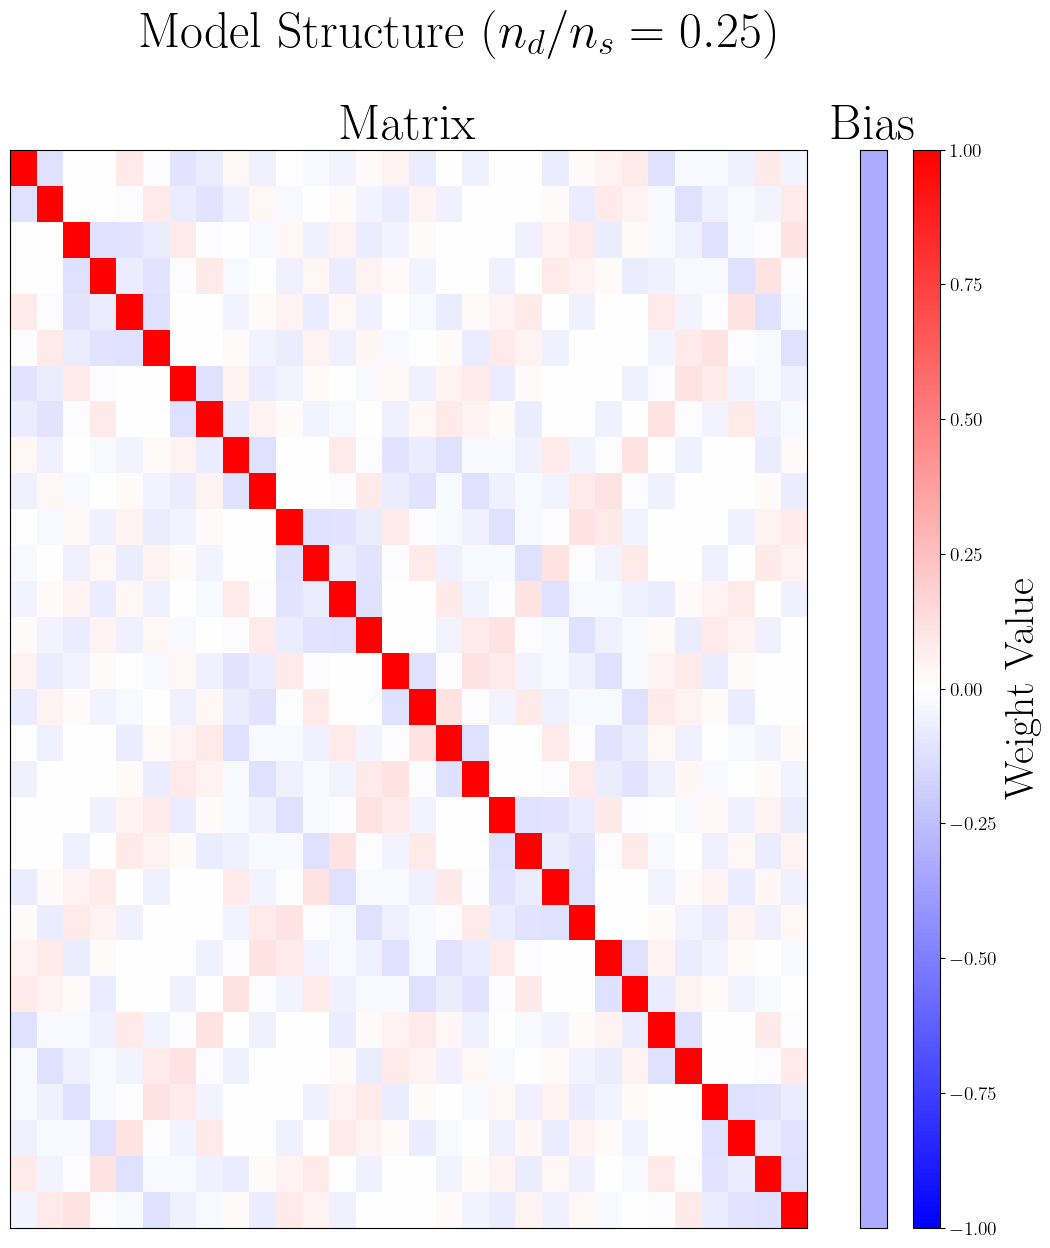

In [13]:
h_model_Wmat = h_model.W_matrix()[0:30,0:30].detach().cpu().numpy()
h_model_mean = h_model.mean.detach().cpu().numpy()*np.ones(30)
plot_matrix_vector(h_model_Wmat, h_model_mean, ratio=h_model.n_dense / h_model.n_sparse)


